[nltk_data] Downloading package stopwords to C:\Users\Shaik
[nltk_data]     Shafiya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Shaik
[nltk_data]     Shafiya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Classification Report:
               precision    recall  f1-score   support

    negative       0.60      1.00      0.75         3
     neutral       1.00      1.00      1.00         5
    positive       1.00      0.50      0.67         4

    accuracy                           0.83        12
   macro avg       0.87      0.83      0.81        12
weighted avg       0.90      0.83      0.83        12

Accuracy: 0.83


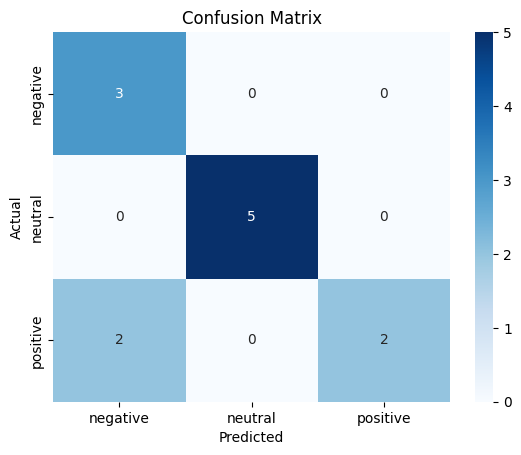

C:\Users\Shaik Shafiya\AppData\Local\Temp\ipykernel_23044\2132369745.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Actual', data=comparison_df, order=sentiment_order,
C:\Users\Shaik Shafiya\AppData\Local\Temp\ipykernel_23044\2132369745.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted', data=comparison_df, order=sentiment_order,


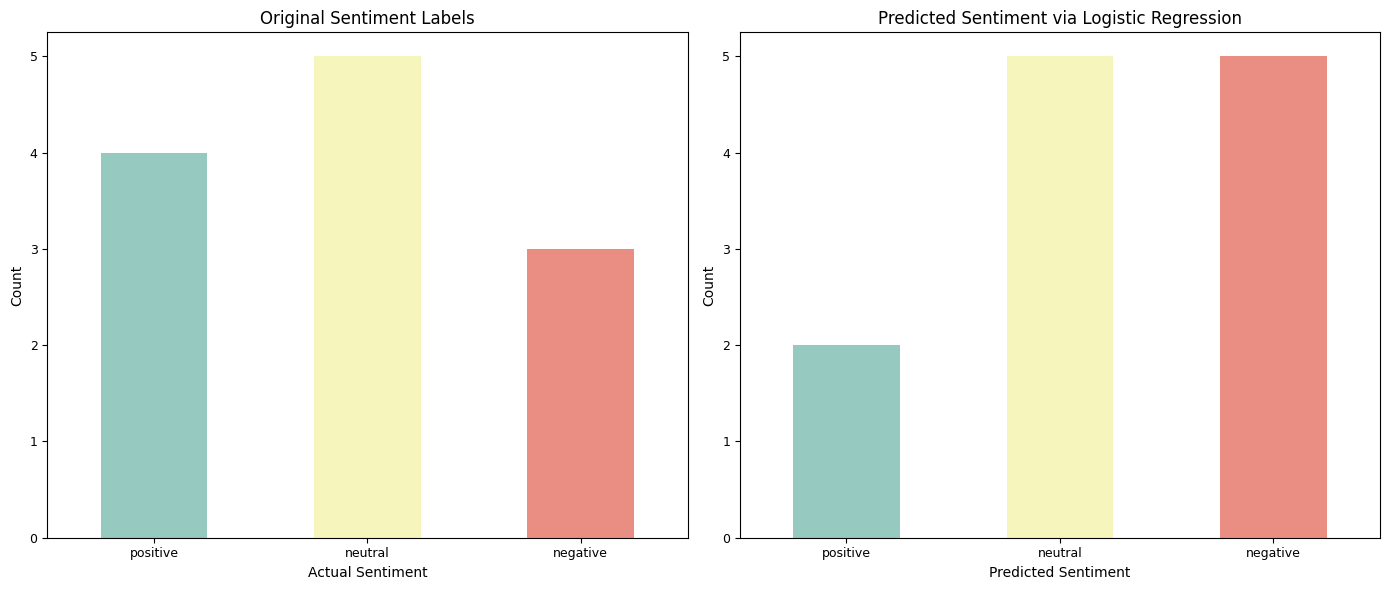

In [1]:
# Import the necesssary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
df = pd.read_csv(r"C:\Users\Shaik Shafiya\Downloads\sentiment_large_data.csv") 

# Preprocessing function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(preprocess)

# Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

sentiment_order = ['positive', 'neutral', 'negative']
color_palette = {
    'positive': '#8dd3c7',
    'neutral': '#ffffb3',
    'negative': '#fb8072'
}

comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Actual Sentiment Bar Graph (with narrow bars)
sns.countplot(x='Actual', data=comparison_df, order=sentiment_order,
              palette=[color_palette[sent] for sent in sentiment_order],
              ax=axes[0], width=0.5)  
axes[0].set_title('Original Sentiment Labels', fontsize=12)
axes[0].set_xlabel('Actual Sentiment', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)
axes[0].tick_params(axis='x', labelsize=9)
axes[0].tick_params(axis='y', labelsize=9)

# Predicted Sentiment Bar Graph (with narrow bars)
sns.countplot(x='Predicted', data=comparison_df, order=sentiment_order,
              palette=[color_palette[sent] for sent in sentiment_order],
              ax=axes[1], width=0.5)  
axes[1].set_title('Predicted Sentiment via Logistic Regression', fontsize=12)
axes[1].set_xlabel('Predicted Sentiment', fontsize=10)
axes[1].set_ylabel('Count', fontsize=10)
axes[1].tick_params(axis='x', labelsize=9)
axes[1].tick_params(axis='y', labelsize=9)

plt.tight_layout()
plt.show()
